In [20]:
from main import*

### Зададим параметры для тестов и функцию, которая будет их выполнять

In [21]:
START_RANDOM_SEED = 100
NUMBER_OF_PLAYS = 100

MIN_VALUE = 1
MAX_VALUE = 20

MIN_WEIGHT = 1
MAX_WEIGHT = 20


def get_average_result(greedy_solver: KnapsackGreedy, genetic_solver: KnapsackGenetic, number_of_objects):
    capacity = round((MAX_WEIGHT - MIN_WEIGHT)*0.5) * round(number_of_objects*0.5)
    sum_greedy = 0
    sum_genetic = 0
    current_random_seed = START_RANDOM_SEED
    for _ in range(NUMBER_OF_PLAYS):
        random.seed(current_random_seed)
        task_conditions = get_random_task_conditions(number_of_objects, MIN_VALUE, MAX_VALUE, MIN_WEIGHT, MAX_WEIGHT, capacity)

        objects_presence, sum_value, sum_weight = greedy_solver.get_solution(*task_conditions)
        sum_greedy = sum_greedy + sum_value

        (best_individual, sum_value, sum_weight), iterations_count = genetic_solver.get_solution(*task_conditions)
        sum_genetic = sum_genetic + sum_value

        current_random_seed = current_random_seed + 1

    average_greedy_sum = sum_greedy/NUMBER_OF_PLAYS
    average_genetic_sum = sum_genetic/NUMBER_OF_PLAYS

    return average_greedy_sum, average_genetic_sum


### Определим единый элемент, который будет решать по жадному алгоритму

In [22]:
greedy_solver = KnapsackGreedy()

### Зафиксируем некоторые настройки генетического алгоритма, общие для всех комбинаций

In [23]:
INITIAL_POPULATION_FUNCTION="get_initial_population"
FITNESS_EVALUATION_FUNCTION="fitness_evaluation_without_zeroing_out"
MUTATION_FUNCTION="each_gene_mutation"
NUMBER_OF_RANDOM_INITIAL_INDIVIDUALS=100
NUMBER_OF_GREED_INITIAL_INDIVIDUALS=0
CROSSOVER_PROBABILITY=0.85
MUTATION_PROBABILITY=0.1
NUMBER_OF_ITERATIONS=2000
USE_ELITISM=True

### Тесты проводятся на 10, 30 и 50 объектах при одинаковых условиях

In [24]:
DIMENSIONS = [10, 30, 50]

def get_result_with_different_dimension(greedy_solver: KnapsackGreedy, genetic_solver: KnapsackGenetic):
    dimensions = DIMENSIONS
    greedy_results = []
    genetic_results = []
    for dimension in dimensions:
        avg_greedy, avg_genetic = get_average_result(greedy_solver, genetic_solver, dimension)
        greedy_results.append(avg_greedy)
        genetic_results.append(avg_genetic)
    
    return greedy_results, genetic_results


### Без коррекции на каждом этапе. Одноточечный кроссовер

In [25]:
genetic_solver1 = KnapsackGenetic(
    initial_population_function=INITIAL_POPULATION_FUNCTION,
    fitness_evaluation_function=FITNESS_EVALUATION_FUNCTION,
    crossover_function="single_point_crossover",
    mutation_function=MUTATION_FUNCTION,
    number_of_random_initial_individuals=NUMBER_OF_RANDOM_INITIAL_INDIVIDUALS,
    number_of_greedy_initial_individuals=NUMBER_OF_GREED_INITIAL_INDIVIDUALS,
    crossover_probability=CROSSOVER_PROBABILITY,
    mutation_probability=MUTATION_PROBABILITY,
    number_of_iterations=NUMBER_OF_ITERATIONS,
    use_elitism=USE_ELITISM,
    use_correction_after_each_step=False
)

In [26]:
greedy1, genetic1 = get_result_with_different_dimension(greedy_solver, genetic_solver1)
print(f"Жадный {greedy1}; Генетический {genetic1}")

Жадный [79.31, 241.06, 408.93]; Генетический [79.86, 241.46, 400.03]


### Без коррекции на каждом этапе. Жадный кроссовер

In [27]:
genetic_solver2 = KnapsackGenetic(
    initial_population_function=INITIAL_POPULATION_FUNCTION,
    fitness_evaluation_function=FITNESS_EVALUATION_FUNCTION,
    crossover_function="greedy_crossover",
    mutation_function=MUTATION_FUNCTION,
    number_of_random_initial_individuals=NUMBER_OF_RANDOM_INITIAL_INDIVIDUALS,
    number_of_greedy_initial_individuals=NUMBER_OF_GREED_INITIAL_INDIVIDUALS,
    crossover_probability=CROSSOVER_PROBABILITY,
    mutation_probability=MUTATION_PROBABILITY,
    number_of_iterations=NUMBER_OF_ITERATIONS,
    use_elitism=USE_ELITISM,
    use_correction_after_each_step=False
)

In [28]:
greedy2, genetic2 = get_result_with_different_dimension(greedy_solver, genetic_solver2)
print(f"Жадный {greedy2}; Генетический {genetic2}")

Жадный [79.31, 241.06, 408.93]; Генетический [79.86, 242.67, 409.79]


### Без коррекции на каждом этапе. Зигзаг кроссовер

In [29]:
genetic_solver3 = KnapsackGenetic(
    initial_population_function=INITIAL_POPULATION_FUNCTION,
    fitness_evaluation_function=FITNESS_EVALUATION_FUNCTION,
    crossover_function="zigzag_crossover",
    mutation_function=MUTATION_FUNCTION,
    number_of_random_initial_individuals=NUMBER_OF_RANDOM_INITIAL_INDIVIDUALS,
    number_of_greedy_initial_individuals=NUMBER_OF_GREED_INITIAL_INDIVIDUALS,
    crossover_probability=CROSSOVER_PROBABILITY,
    mutation_probability=MUTATION_PROBABILITY,
    number_of_iterations=NUMBER_OF_ITERATIONS,
    use_elitism=USE_ELITISM,
    use_correction_after_each_step=False
)

In [30]:
greedy3, genetic3 = get_result_with_different_dimension(greedy_solver, genetic_solver3)
print(f"Жадный {greedy3}; Генетический {genetic3}")

Жадный [79.31, 241.06, 408.93]; Генетический [79.86, 241.16, 396.16]


### C коррекцией на каждом этапе. Одноточечный кроссовер

In [31]:
genetic_solver4 = KnapsackGenetic(
    initial_population_function=INITIAL_POPULATION_FUNCTION,
    fitness_evaluation_function=FITNESS_EVALUATION_FUNCTION,
    crossover_function="single_point_crossover",
    mutation_function=MUTATION_FUNCTION,
    number_of_random_initial_individuals=NUMBER_OF_RANDOM_INITIAL_INDIVIDUALS,
    number_of_greedy_initial_individuals=NUMBER_OF_GREED_INITIAL_INDIVIDUALS,
    crossover_probability=CROSSOVER_PROBABILITY,
    mutation_probability=MUTATION_PROBABILITY,
    number_of_iterations=NUMBER_OF_ITERATIONS,
    use_elitism=USE_ELITISM,
    use_correction_after_each_step=True
)

In [32]:
greedy4, genetic4 = get_result_with_different_dimension(greedy_solver, genetic_solver4)
print(f"Жадный {greedy4}; Генетический {genetic4}")

Жадный [79.31, 241.06, 408.93]; Генетический [79.86, 241.72, 399.22]


### C коррекцией на каждом этапе. Жадный кроссовер

In [33]:
genetic_solver5 = KnapsackGenetic(
    initial_population_function=INITIAL_POPULATION_FUNCTION,
    fitness_evaluation_function=FITNESS_EVALUATION_FUNCTION,
    crossover_function="greedy_crossover",
    mutation_function=MUTATION_FUNCTION,
    number_of_random_initial_individuals=NUMBER_OF_RANDOM_INITIAL_INDIVIDUALS,
    number_of_greedy_initial_individuals=NUMBER_OF_GREED_INITIAL_INDIVIDUALS,
    crossover_probability=CROSSOVER_PROBABILITY,
    mutation_probability=MUTATION_PROBABILITY,
    number_of_iterations=NUMBER_OF_ITERATIONS,
    use_elitism=USE_ELITISM,
    use_correction_after_each_step=True
)

In [34]:
greedy5, genetic5 = get_result_with_different_dimension(greedy_solver, genetic_solver5)
print(f"Жадный {greedy5}; Генетический {genetic5}")

Жадный [79.31, 241.06, 408.93]; Генетический [79.86, 242.67, 409.77]


### C коррекцией на каждом этапе. Зигзаг кроссовер

In [35]:
genetic_solver6 = KnapsackGenetic(
    initial_population_function=INITIAL_POPULATION_FUNCTION,
    fitness_evaluation_function=FITNESS_EVALUATION_FUNCTION,
    crossover_function="zigzag_crossover",
    mutation_function=MUTATION_FUNCTION,
    number_of_random_initial_individuals=NUMBER_OF_RANDOM_INITIAL_INDIVIDUALS,
    number_of_greedy_initial_individuals=NUMBER_OF_GREED_INITIAL_INDIVIDUALS,
    crossover_probability=CROSSOVER_PROBABILITY,
    mutation_probability=MUTATION_PROBABILITY,
    number_of_iterations=NUMBER_OF_ITERATIONS,
    use_elitism=USE_ELITISM,
    use_correction_after_each_step=True
)

In [36]:
greedy6, genetic6 = get_result_with_different_dimension(greedy_solver, genetic_solver6)
print(f"Жадный {greedy6}; Генетический {genetic6}")

Жадный [79.31, 241.06, 408.93]; Генетический [79.86, 241.11, 396.17]


### Построем таблицу с полученными результатами

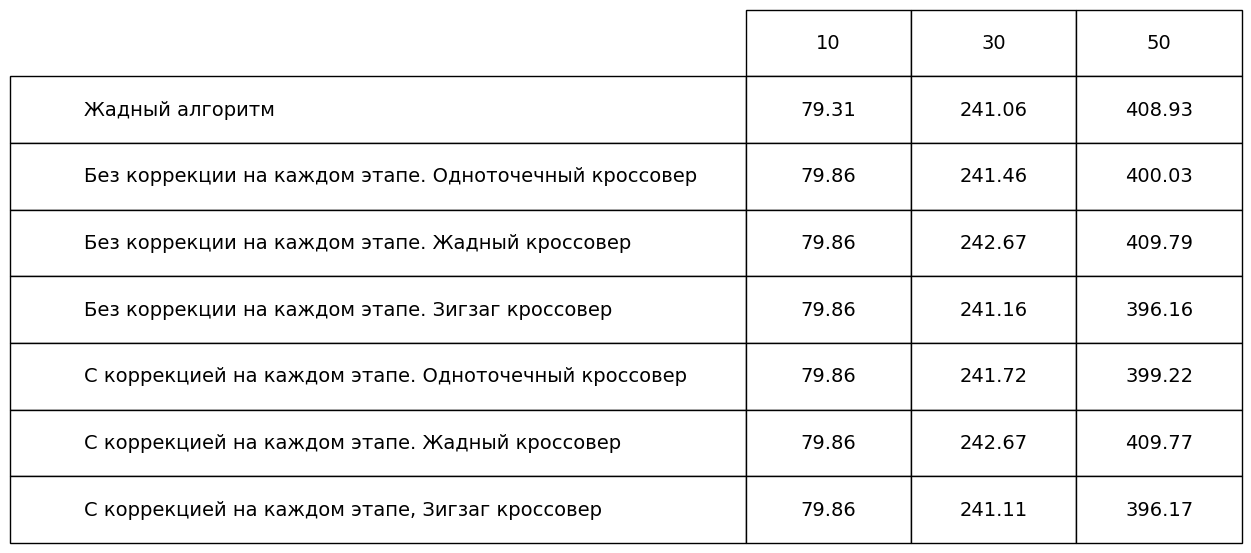

In [66]:
import matplotlib.pyplot as plt

column_labels = DIMENSIONS
row_labels = [
    'Жадный алгоритм',
    'Без коррекции на каждом этапе. Одноточечный кроссовер', 
    'Без коррекции на каждом этапе. Жадный кроссовер',
    'Без коррекции на каждом этапе. Зигзаг кроссовер', 
    'C коррекцией на каждом этапе. Одноточечный кроссовер',
    'C коррекцией на каждом этапе. Жадный кроссовер',
    'C коррекцией на каждом этапе. Зигзаг кроссовер']
data = [greedy1, genetic1, genetic2, genetic3, genetic4, genetic5, genetic6]

table = plt.table(cellText=data,
          rowLabels=row_labels,
          colLabels=column_labels,
          loc='center',
          cellLoc='center')

table.set_fontsize(14)
table.scale(1,4)

plt.axis('off')

plt.show()